In [1]:
""" Import Statements """

# Classics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load("en_core_web_lg")

In [2]:
text = "We created a new dataset which emphasizes diversity of content, by scraping content from the Internet. In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, we used outbound links from Reddit which received at least 3 karma. This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl."

In [3]:
doc = nlp(text)

print([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])

['create', 'new', 'dataset', 'emphasize', 'diversity', 'content', 'scrape', 'content', 'internet', 'order', 'preserve', 'document', 'quality', 'page', 'curate', 'filter', 'human', 'specifically', 'outbound', 'link', 'Reddit', 'receive', '3', 'karma', 'think', 'heuristic', 'indicator', 'user', 'find', 'link', 'interesting', 'educational', 'funny', 'lead', 'high', 'datum', 'quality', 'similar', 'dataset', 'CommonCrawl']


In [4]:
import os

def gather_data(filefolder):
    """ Produces List of Documents from a Directory
    
    filefolder (str): a path of .txt files
    
    returns list of strings 
    """
    
    data = []
    
    files = os.listdir(filefolder) # Causes variation across machines
    
    for article in files: 
        
        path = os.path.join(filefolder, article)
                    
        if  path[-3:] == 'txt': # os ~endswith('txt')
            with open(path, 'rb') as f:
                data.append(f.read())
    
    return data

In [5]:
data = gather_data('./data')

In [6]:
data[0]

b'Mobiles rack up 20 years of use\n\nMobile phones in the UK are celebrating their 20th anniversary this weekend.\n\nBritain\'s first mobile phone call was made across the Vodafone network on 1 January 1985 by veteran comedian Ernie Wise. In the 20 years since that day, mobile phones have become an integral part of modern life and now almost 90% of Britons own a handset. Mobiles have become so popular that many people use their handset as their only phone and rarely use a landline.\n\nThe first ever call over a portable phone was made in 1973 in New York but it took 10 years for the first commercial mobile service to be launched. The UK was not far behind the rest of the world in setting up networks in 1985 that let people make calls while they walked. The first call was made from St Katherine\'s dock to Vodafone\'s head office in Newbury which at the time was over a curry house. For the first nine days of 1985 Vodafone was the only firm with a mobile network in the UK. Then on 10 Janu

# Count Vectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = ["We created a new dataset which emphasizes diversity of content, by scraping content from the Internet."," In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, we used outbound links from Reddit which received at least 3 karma."," This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl."]

# create the transformer
vect = CountVectorizer()

# build vocab
vect.fit(text)

# transform text
dtm = vect.transform(text)

# Create a Vocabulary
# The vocabulary establishes all of the possible words that we might use.

# The vocabulary dictionary does not represent the counts of words!!

In [9]:
type(dtm.todense())

numpy.matrix

In [11]:
print(vect.get_feature_names())

['as', 'at', 'be', 'been', 'by', 'can', 'commoncrawl', 'content', 'created', 'curated', 'data', 'dataset', 'datasets', 'diversity', 'document', 'educational', 'emphasizes', 'filtered', 'for', 'found', 'from', 'funny', 'have', 'heuristic', 'higher', 'humans', 'in', 'indicator', 'interesting', 'internet', 'karma', 'leading', 'least', 'link', 'links', 'new', 'of', 'only', 'or', 'order', 'other', 'outbound', 'pages', 'preserve', 'quality', 'received', 'reddit', 'scraping', 'similar', 'specifically', 'such', 'than', 'the', 'this', 'thought', 'to', 'used', 'users', 'we', 'whether', 'which']


In [12]:
text[:25]

['We created a new dataset which emphasizes diversity of content, by scraping content from the Internet.',
 ' In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, we used outbound links from Reddit which received at least 3 karma.',
 ' This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl.']

In [13]:
print(dtm)

  (0, 4)	1
  (0, 7)	2
  (0, 8)	1
  (0, 11)	1
  (0, 13)	1
  (0, 16)	1
  (0, 20)	1
  (0, 29)	1
  (0, 35)	1
  (0, 36)	1
  (0, 47)	1
  (0, 52)	1
  (0, 58)	1
  (0, 60)	1
  (1, 1)	1
  (1, 3)	1
  (1, 4)	1
  (1, 9)	1
  (1, 14)	1
  (1, 17)	1
  (1, 20)	1
  (1, 22)	1
  (1, 25)	1
  (1, 26)	1
  (1, 30)	1
  :	:
  (2, 10)	1
  (2, 12)	1
  (2, 15)	1
  (2, 18)	1
  (2, 19)	1
  (2, 21)	1
  (2, 23)	1
  (2, 24)	1
  (2, 27)	1
  (2, 28)	1
  (2, 31)	1
  (2, 33)	1
  (2, 36)	1
  (2, 38)	1
  (2, 40)	2
  (2, 44)	1
  (2, 48)	1
  (2, 50)	1
  (2, 51)	1
  (2, 52)	1
  (2, 53)	1
  (2, 54)	1
  (2, 55)	1
  (2, 57)	1
  (2, 59)	2


In [14]:
# Dealing with Sparse Matrix
dtm.todense()

matrix([[0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
         0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
         1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2],
        [2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
         1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0,
         0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0]])

In [15]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [16]:
# Get word counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,as,at,be,been,by,can,commoncrawl,content,created,curated,...,than,the,this,thought,to,used,users,we,whether,which
0,0,0,0,0,1,0,0,2,1,0,...,0,1,0,0,0,0,0,1,0,1
1,0,1,0,1,1,0,0,0,0,1,...,0,0,0,0,1,2,0,2,0,2
2,2,0,1,0,0,1,1,0,0,0,...,1,1,1,1,1,0,1,0,2,0


In [17]:
data[0][:25]

b'Mobiles rack up 20 years '

#### Three Minute Challenge

In [19]:
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in 'data' variable

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', max_features=1000)

# Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [20]:
dtm.head()

,000,10,100,11,12,14,15,18,20,200,...,worldwide,worm,worth,writing,xbox,xp,yahoo,year,years,york
0,1,2,0,0,0,0,0,1,3,0,...,0,0,0,0,0,0,0,0,4,1
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2,0,0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,2,2,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
doc_len = [len(doc) for doc in data]

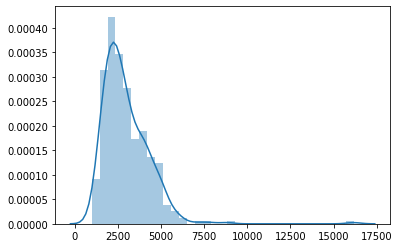

In [22]:
import seaborn as sns

sns.distplot(doc_len);

### Term Frequency - Inverse Document Frequency (TF-IDF)

Term Frequency: Percentage of words in document for each word

Document Frequency: Penalty for the word existing in a high number of documents


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similar to fit_predict
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,10,100,101,104,10m,11,12,120,13,...,yoda,yoran,york,young,younger,youngsters,youth,zafi,zen,zombies
0,0.028940,0.066646,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.05528,0.058505,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.077901,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.061896,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [28]:
# Tuning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data) # Similar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,10,15,2004,50,ability,accord,add,airline,announce,anti,...,£ 11.5,£ 132,"£ 2,000",£ 20,£ 339,£ 4.99,£ 40,£ 5,£ 50,£ 99
0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.066239,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.084052,0.0,0.0,0.07375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Query Documents by Similarity

In [29]:
# Calculate distance of TF-IDF Vectors
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix = cosine_similarity(dtm)

In [30]:
# Turn it into DataFrame

df = pd.DataFrame(dist_matrix)

In [31]:
# Size of similarity matrix?
df.shape

(401, 401)

In [32]:
data[0][:100]

b'Mobiles rack up 20 years of use\n\nMobile phones in the UK are celebrating their 20th anniversary this'

In [33]:
# Each row is the similarity of one document to all other documents (including itself)
df[0][:5]

0    1.000000
1    0.071712
2    0.033523
3    0.007270
4    0.066575
Name: 0, dtype: float64

In [34]:
# Grab the row
df[df[0] <1][0].sort_values(ascending=False)[:5]

92     0.368093
297    0.348871
300    0.305984
187    0.266188
63     0.261532
Name: 0, dtype: float64

In [35]:
print(data[0][:150])

b"Mobiles rack up 20 years of use\n\nMobile phones in the UK are celebrating their 20th anniversary this weekend.\n\nBritain's first mobile phone call was m"


In [36]:
print(data[297][:150])

b"'Friends fear' with lost mobiles\n\nPeople are becoming so dependent on their mobile phones that one in three are concerned that losing their phone woul"


# NearestNeighbor (K-NN)

In [37]:
dtm.head()

,10,15,2004,50,ability,accord,add,airline,announce,anti,...,£ 11.5,£ 132,"£ 2,000",£ 20,£ 339,£ 4.99,£ 40,£ 5,£ 50,£ 99
0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.066239,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.084052,0.0,0.0,0.07375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [40]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 0.        , 1.12419457, 1.1411654 , 1.17814811]]),
 array([[  0,  62,  92, 297, 300]]))

In [41]:
# Query using kneighbors
nn.kneighbors([dtm.iloc[256]])

(array([[0.        , 0.        , 0.93038176, 1.09357791, 1.12418294]]),
 array([[256,  12, 121, 155, 351]]))

In [42]:
data[256][:200]

b"Sony PSP console hits US in March\n\nUS gamers will be able to buy Sony's PlayStation Portable from 24 March, but there is no news of a Europe debut.\n\nThe handheld console will go on sale for $250 (\xc2\xa313"

In [43]:
data[121][:200]

b"Sony PSP handheld console hits US\n\nThe latest handheld gaming gadget, Sony's PlayStation Portable, goes on sale in the US on Thursday.\n\nThe entertainment device, which also stores images, music and vi"

In [44]:
rndm_tech_article = [ """
Final Fantasy VII Remake and Marvel’s Avengers, two of this year’s major releases, have both been postponed. Square Enix, the publisher behind the titles, announced the news Tuesday morning.

Avengers is being pushed back four months, with its new release date set for September 4. The arrival of Final Fantasy VII Remake has been bumped by one month, moving from March 3 to April 10.

Delays for massive blockbuster games are common around this time of year. With the industry preparing for big, anticipated releases slated for spring, summer and the holidays, the news from Square Enix isn’t all that surprising. Early builds for Marvel’s Avengers received a mixed reception at E3 2019 and subsequent, similar events. Final Fantasy VII fans will likely have a critical eye when revisiting the classic, setting a high bar for developers to clear.

Final Fantasy VII Remake is among The Washington Post's most anticipated games of 2020.

“We are making this tough decision in order to give ourselves a few extra weeks to apply final polish to the game and to deliver you with the best possible experience,” wrote Final Fantasy VII Remake producer Yoshinori Kitase in a statement. “I, on behalf of the whole team, want to apologize to everyone, as I know this means waiting for the game just a little bit longer.”

Marvel’s Avengers’s developer Crystal Dynamics released a similar statement, with studio co-heads Scot Amos and Ron Rosenberg citing “fine tuning and polishing” as the reason for the delay. “We will spend this additional development time focusing on fine tuning and polishing the game to the high standards our fans expect and deserve.”

"""]



In [45]:
# Query for Sim of Random doc to BBC
new = tfidf.transform(rndm_tech_article)

In [46]:
new

<1x8218 sparse matrix of type '<class 'numpy.float64'>'
	with 98 stored elements in Compressed Sparse Row format>

In [47]:
nn.kneighbors(new.todense())

(array([[1.30401736, 1.30702952, 1.30720438, 1.31127454, 1.3120807 ]]),
 array([[368, 241, 140, 293, 195]]))

In [49]:
# Inspect most relevant result
data[140]

b'Losing yourself in online gaming\n\nOnline role playing games are time-consuming, but enthralling flights from reality. But are some people taking their fantasy lives too seriously?\n\nWhen video game World of Warcraft hit the shops in Europe last week fans wrote in to the BBC website to express their delight - and to offer a warning. "An addiction to a game like this is far more costly in time than any substance could impair - keep track of time," wrote Travis Anderson, in Texas. Some of the comments were humorous: "This game is so good I\'m not going to get it, there\'s no way I could limit the hours I\'d spend playing it," wrote Charles MacIntyre, from England.\n\nBut some struck a more worrying tone about the Massively Multiplayer Online Role Playing Game (MMORPG): "\'You need to get out more\' could be the motto of any MMORPG. Shame they are getting more popular, as you know this problem is just going to mushroom," wrote Stuart Stanton-Davies, in Huddersfield. Scare-mongering ar

In [50]:
data[241]

b"Football Manager scores big time\n\nFor the past decade or so the virtual football fans among us will have become used to the annual helping of Championship Manager (CM). Indeed, it seems like there has been a CM game for as many years as there have been PCs.\n\nHowever, last year was the final time that developers Sports Interactive (SI) and publishers Eidos would work together. They decided to go their separate ways, and each kept a piece of the franchise. SI kept the game's code and database, and Eidos retained rights to the CM brand, and the look and feel of the game. So at the beginning of this year, fans faced a new situation. Eidos announced the next CM game, with a new team to develop it from scratch, whilst SI developed the existing code further to be released, with new publishers Sega, under the name Football Manager. So what does this mean? Well, Football Manager is the spiritual successor to the CM series, and it has been released earlier than expected. At this point CM5 

In [51]:
data[322]

b'Mobile games come of age\n\nThe BBC News website takes a look at how games on mobile phones are maturing. A brief round-up follows but you can skip straight to the reviews by clicking on the links below.\n\nIf you think of Snake when some mentions "mobile games" then you could be in for a bit of a surprise. This is because mobile games have come a long way in a very short time. Even before Nokia\'s N-Gage game phone launched in late 2003, many mobile operators were realising that there was an audience looking for something to play on their handset.\n\nAnd given that many more people own handsets than own portable game playing gadgets such as the GameBoy it could be a very lucrative market. That audience includes commuters wanting something to fill their time on the way home, game fans looking for a bit of variety and hard core gamers who like to play every moment they can. Life for all these types of player has got immeasurably better in the last year as the numbers of titles you can

In [52]:
# Process a text
nlp = spacy.load('en_core_web_lg')

doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
bananas_vector = doc.vector
print(bananas_vector)

[ 2.07984239e-01 -2.60890484e-01 -1.15457252e-01 -1.96443751e-01
 -2.83249468e-03  3.55849974e-02 -2.05170006e-01 -2.27374747e-01
  8.56052488e-02  1.36894751e+00 -5.74124977e-02  8.06210041e-02
  2.37275064e-02  1.17454052e-01 -6.53099641e-03 -1.24400005e-01
  1.99086756e-01  6.37722552e-01  1.52916998e-01 -2.33504996e-01
 -2.40909994e-01 -7.11500049e-02 -9.10753161e-02  7.16734976e-02
  1.16262749e-01 -3.91372502e-01  1.13048747e-01 -2.11327493e-01
  1.09019078e-01 -2.44885415e-01  3.00577488e-02  4.77855802e-02
  7.37800002e-02  2.57142037e-01  2.62586236e-01 -1.66897491e-01
  1.87596500e-01 -1.23680010e-02 -1.76299751e-01  1.11685000e-01
  1.82024967e-02  9.86500084e-03 -3.58770013e-01 -2.23265499e-01
 -4.37720008e-02  3.63999486e-01  7.42954984e-02  1.21225506e-01
  1.37013003e-01 -5.50666526e-02  2.66017504e-02  8.87180045e-02
 -1.14092499e-01 -2.02865750e-01  3.63092512e-01 -3.08394760e-01
  1.13859497e-01  3.13650146e-02  2.62076259e-01  1.90399922e-02
  7.24634901e-02  2.79004

In [53]:
len(bananas_vector)

300

In [55]:
doc1 = nlp("It's a warm summer day")
doc2 = nlp("I like dogs.")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

0.6325916466756616


In [57]:
# Import the PCA module from sklearn
from sklearn.decomposition import PCA

def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

words = ['car', 'truck', 'suv', 'race', 'elves', 'dragon', 'sword', 'king', 'queen', 'prince', 'horse', 'fish' , 'lion', 'tiger', 'lynx', 'potato']

# initialize pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best
# way to project the data down that will best maintain the relative distance
# between data points. It will store these instructions on how to transform the data
pca.fit(get_word_vectors(words))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(words))

# Look at our new 2D word vectors
word_vecs_2d

array([[ 5.15021219, -1.02589405],
       [ 4.68847306, -0.32752874],
       [ 4.18183622, -1.25490821],
       [ 2.3045236 , -0.62841121],
       [-1.6975279 , -1.26790577],
       [-2.19008419,  0.0674359 ],
       [-2.41987038, -1.23168885],
       [-2.4303113 , -2.84156896],
       [-1.9405539 , -2.55571106],
       [-2.16312982, -2.6337209 ],
       [ 0.66759362,  0.42236702],
       [-0.36687779,  4.15296085],
       [-1.89448123,  1.39241361],
       [-1.44081158,  2.52885279],
       [-0.87134078,  2.86535252],
       [ 0.42235018,  2.33795505]])

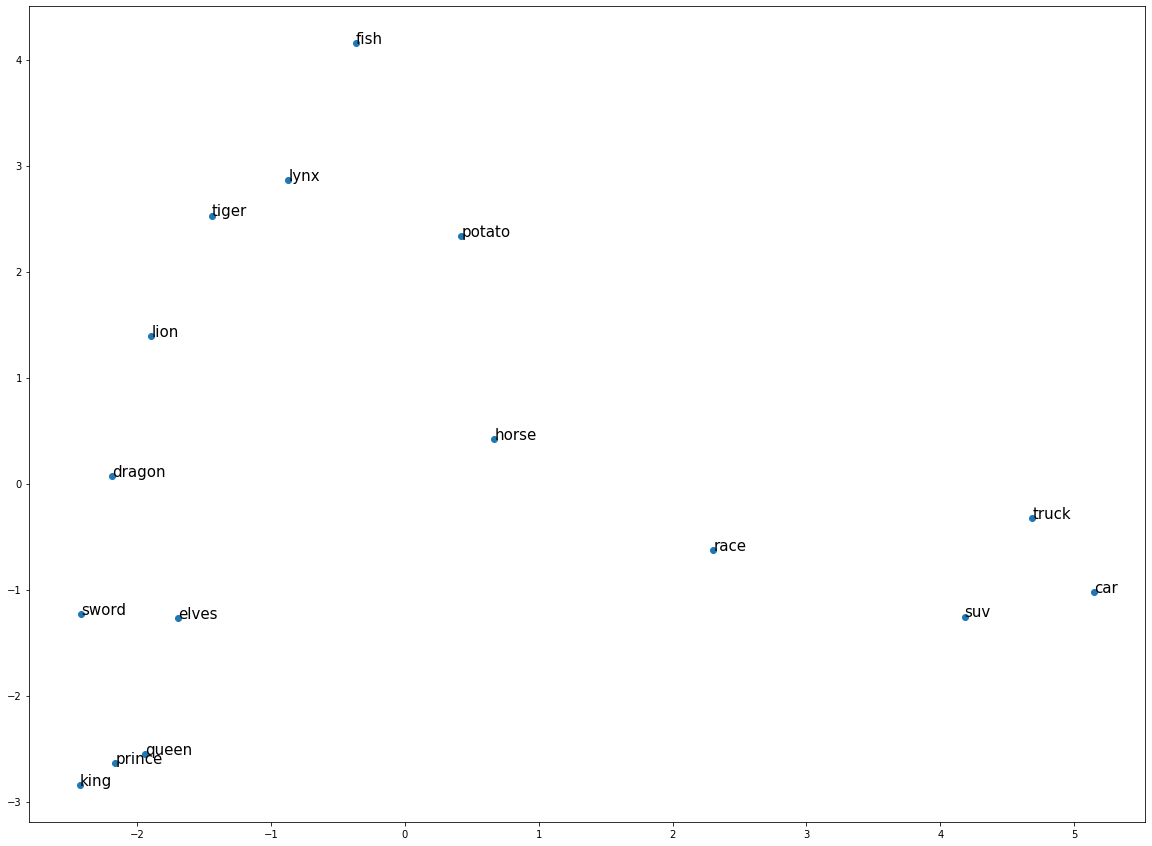

In [58]:
# Create a nice big plot
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:, 1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size=15)
    
# show the plot
plt.show()

In [59]:
X = [nlp(str(d)).vector for d in data]

In [60]:
pd.DataFrame(X).shape

(401, 300)

In [62]:
pca = PCA(n_components=2)

pca.fit(X)

X_2d = pca.transform(X)

X_2d

array([[ 1.40398570e-01,  4.75603498e-02],
       [ 7.60075994e-02,  3.06870111e-01],
       [ 2.93182079e-01, -2.01274026e-01],
       [-2.91772844e-01,  1.95022139e-01],
       [-3.78672556e-02, -8.22900362e-02],
       [-2.58748508e-01, -2.17532874e-01],
       [ 5.07087813e-02, -1.42065798e-01],
       [ 2.71648947e-01, -4.49976183e-01],
       [ 3.00372637e-01,  5.92498706e-02],
       [-2.36468964e-01,  5.13614388e-02],
       [ 3.94938950e-02,  3.48169861e-03],
       [-1.96836520e-01,  7.34168887e-02],
       [ 5.21823471e-01,  2.37117020e-01],
       [ 1.30788305e-02,  3.24236396e-01],
       [-3.25539619e-01, -9.24413834e-02],
       [ 6.23677061e-02, -6.91526202e-02],
       [-2.12661640e-01, -9.09077841e-02],
       [-1.96836520e-01,  7.34168887e-02],
       [-1.55177413e-01,  4.70238889e-02],
       [ 1.46673917e-01, -2.24136157e-01],
       [ 6.90633457e-02,  2.01811520e-01],
       [ 1.67202215e-01, -3.74434693e-01],
       [-7.06559228e-02,  9.31264877e-02],
       [-1.

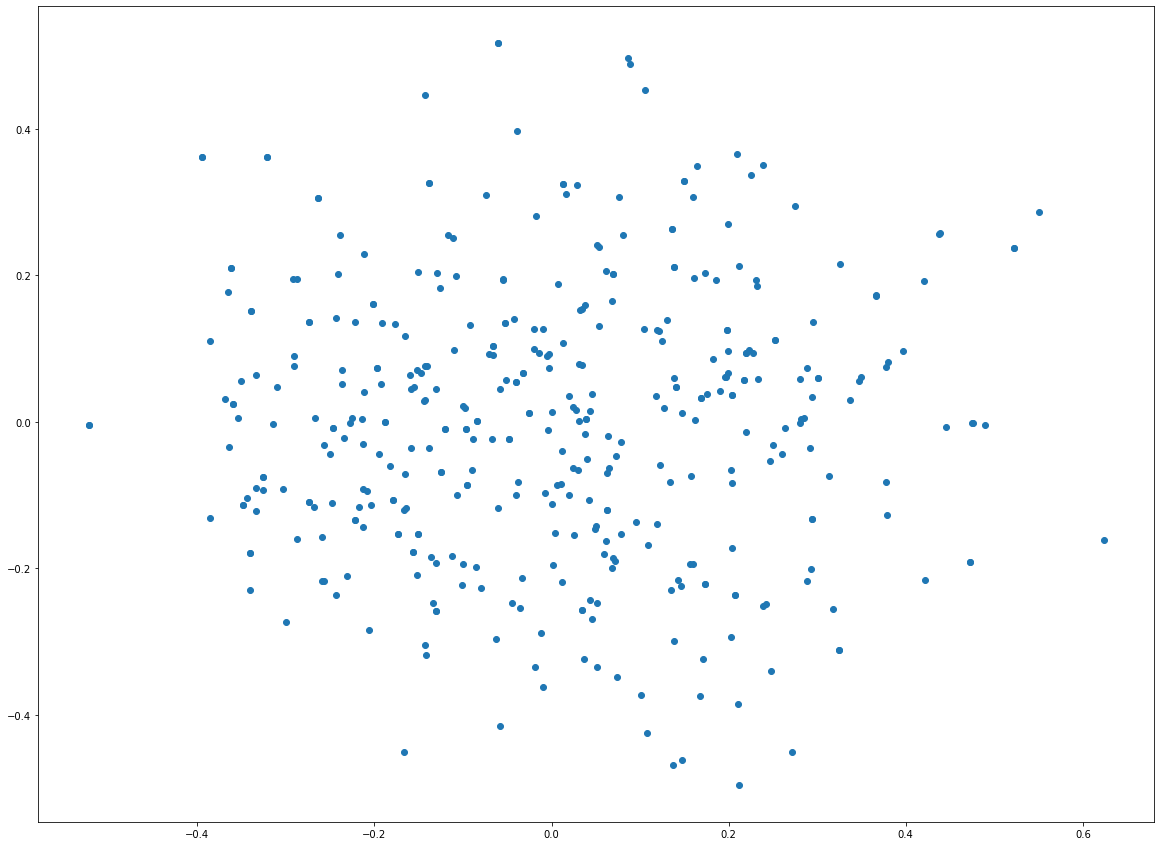

In [64]:
plt.figure(figsize=(20,15))

plt.scatter(X_2d[:, 0], X_2d[:, 1])

plt.show()